<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/mass-shooting-analysis?scriptVersionId=96788424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mass-shootings-in-united-states-20182022/shootings_2019.csv
/kaggle/input/mass-shootings-in-united-states-20182022/shootings_2022.csv
/kaggle/input/mass-shootings-in-united-states-20182022/shootings_2018.csv
/kaggle/input/mass-shootings-in-united-states-20182022/shootings_2020.csv
/kaggle/input/mass-shootings-in-united-states-20182022/shootings_2021.csv


In [2]:
shooting_2018 = pd.read_csv("../input/mass-shootings-in-united-states-20182022/shootings_2018.csv")
shooting_2019 = pd.read_csv("../input/mass-shootings-in-united-states-20182022/shootings_2019.csv")
shooting_2020 = pd.read_csv("../input/mass-shootings-in-united-states-20182022/shootings_2020.csv")
shooting_2021 = pd.read_csv("../input/mass-shootings-in-united-states-20182022/shootings_2021.csv")
shooting_2022 = pd.read_csv("../input/mass-shootings-in-united-states-20182022/shootings_2022.csv")

In [3]:
shooting_2018.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [4]:
total_shootings = [shooting_2018,shooting_2019,shooting_2020,shooting_2021,shooting_2022]

In [5]:
for i in total_shootings:
    print(i.shape)

(322, 6)
(441, 6)
(615, 6)
(694, 6)
(147, 6)


In [6]:
#merging the dataframe with each other
total_data = pd.concat(total_shootings,ignore_index=True)

In [7]:
#checking out the head of the dataframe
total_data.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [8]:
#finding out the missing values in it
total_data.isnull().sum()
#as we can see there are no missing values in our dataset

Date           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [9]:
#finding out the datatype
type(total_data)

pandas.core.frame.DataFrame

In [10]:
print(total_data.dtypes)

Date           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object


In [11]:
total_data.describe()#it is very nice to look at that the python has only selected the integer data type form the data frame

,Dead,Injured,Total
count,2219.000000,2219.000000,2219.000000
mean,1.030194,4.061740,5.090581
std,1.521558,2.274703,2.477381
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,5.000000,5.000000
max,23.000000,27.000000,46.000000


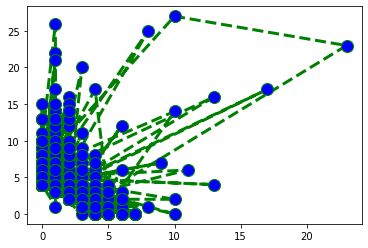

In [12]:
plt.plot(total_data.Dead,total_data.Injured,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

In [13]:
#finding out the categories in the data
print (total_data['State'].unique())

['Ohio' 'Missouri' 'Louisiana' 'Nevada' 'Maryland' 'Florida' 'Colorado'
 'Pennsylvania' 'Wisconsin' 'North Carolina' 'New York' 'Tennessee'
 'Texas' 'Alabama' 'California' 'Indiana' 'Illinois' 'Arkansas'
 'New Mexico' 'Arizona' 'Minnesota' 'Michigan' 'New Jersey' 'Washington'
 'Georgia' 'South Carolina' 'Oklahoma' 'Virginia' 'District of Columbia'
 'Delaware' 'Connecticut' 'Kansas' 'Massachusetts' 'Nebraska'
 'Mississippi' 'Utah' 'Kentucky' 'Iowa' 'Rhode Island' 'Montana' 'Hawaii'
 'Puerto Rico' 'Washington, D.C.' 'Wyoming' 'West Virginia' 'Oregon'
 'United States Virgin Islands' 'Alaska' 'South Dakota' 'Idaho' 'Maine'
 'New Hampshire' 'Washington D.C.']


In [14]:
count_state = pd.DataFrame(total_data['State'].unique())

In [15]:
count_state.value_counts().sum()#though there are 50 state in the united states as per my knowledge,but to be surprising we have the 53 results here.

53

In [16]:
#next we need to convert the type of the column which contains the categorical data in them
total_data = pd.DataFrame(total_data)

<BarContainer object of 2219 artists>

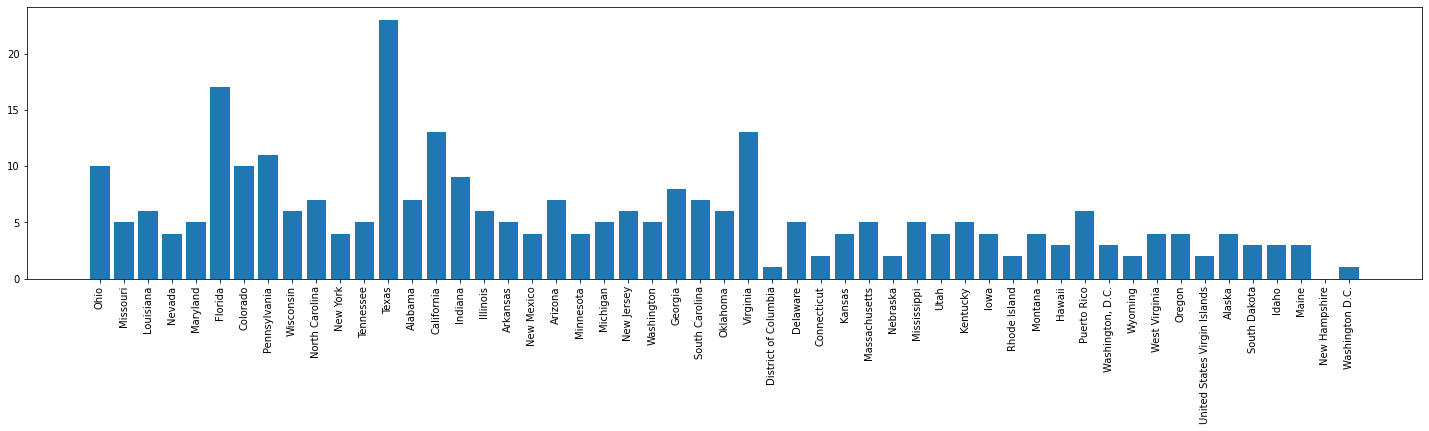

In [17]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.bar(total_data.State,total_data.Dead)